In [22]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 10000

144


Index([u'Unnamed: 0', u'title', u'url', u'org', u'candidate', u'top_topic',
       u'flesch', u'body'],
      dtype='object')

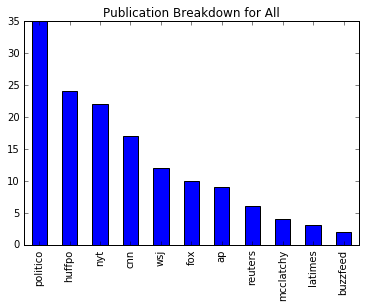

In [15]:
df = pandas.read_csv('data/SurveyReady/for_survey_cleaned_redacted_edited.csv')
print len(df)
df['org'].value_counts().plot(kind="bar", title="Publication Breakdown for All")
df.columns

In [16]:
# recalculate Reading scores
df['gunning_fog'] = df['body'].apply(lambda x: textstat.gunning_fog(x) if type(x) == str else None)
df['flesch_new'] = df['body'].apply(lambda x: textstat.flesch_kincaid_grade(x) if type(x) == str else None)
df['readability'] = df['body'].apply(lambda x: textstat.flesch_reading_ease(x) if type(x) == str else None)

GREEN COLOR IS NEW


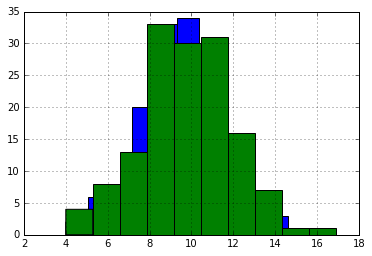

In [29]:
print "GREEN COLOR IS NEW"
df['flesch'].hist()
df['flesch_new'].hist() 

In [48]:
df_updated = df
df_updated = df_updated.drop('flesch',1)
df_updated['flesch'] = df_updated['flesch_new']
#df_updated.to_csv('data/SurveyReady/for_survey_w_new_flesch.csv')

## DATA CHECKS

# Candidate & Topic Count

In [34]:
CANDIDATES = ['clinton', 'trump', 'cruz', 'sanders']
for c in CANDIDATES:
    print c, len(df[df['candidate'] == c])

print
TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security','Abortion']
for t in TOPICS:
    print t, len(df[df['top_topic'] == t])

clinton 36
trump 36
cruz 36
sanders 36

Immigration 36
Campaign Finance 36
Foreign Policy/National Security 36
Abortion 36


## Check Distributions

FLESCH FOR clinton Immigration


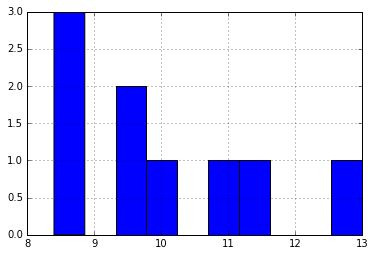

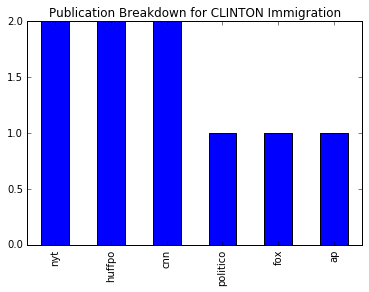

FLESCH FOR clinton Campaign Finance


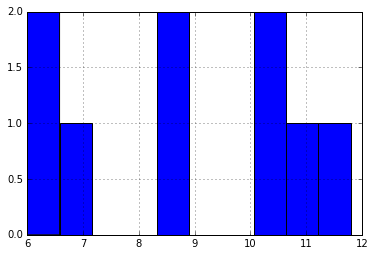

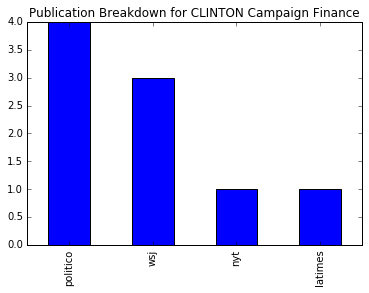

FLESCH FOR clinton Foreign Policy/National Security


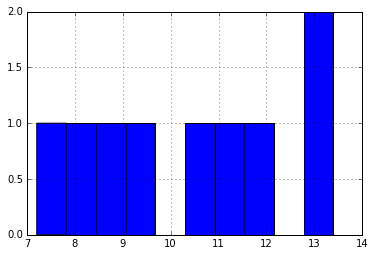

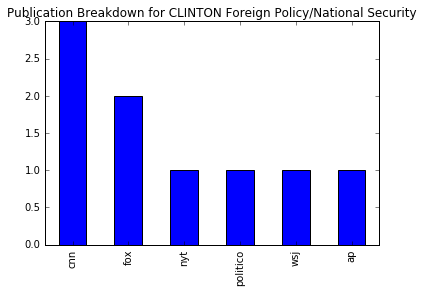

FLESCH FOR clinton Abortion


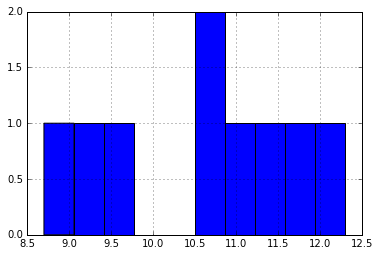

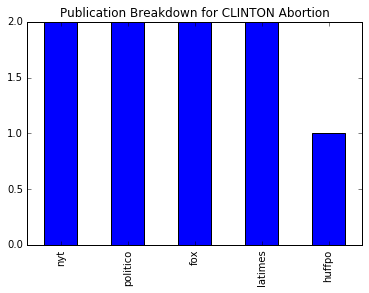

FLESCH FOR trump Immigration


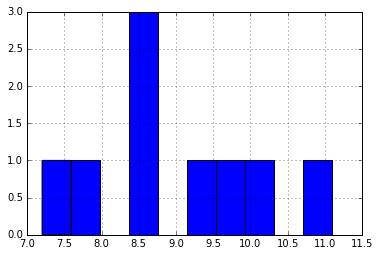

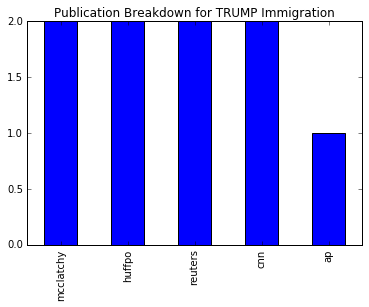

FLESCH FOR trump Campaign Finance


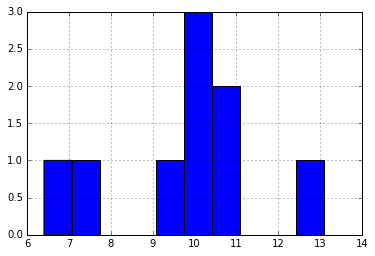

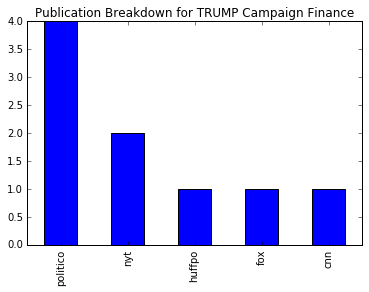

FLESCH FOR trump Foreign Policy/National Security


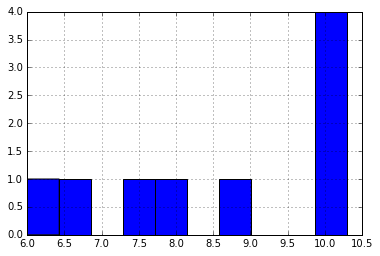

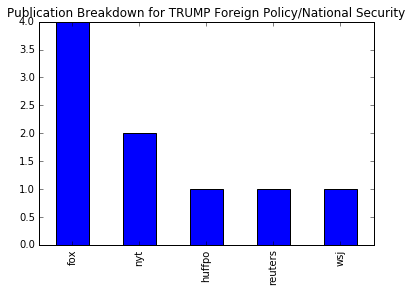

FLESCH FOR trump Abortion


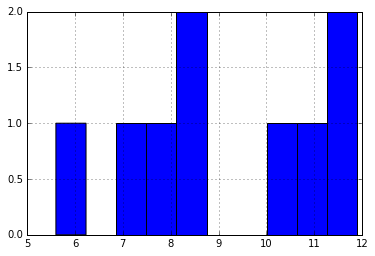

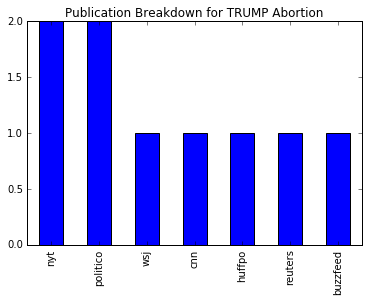

FLESCH FOR cruz Immigration


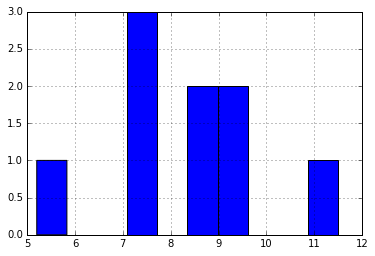

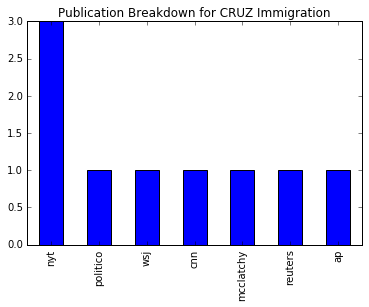

FLESCH FOR cruz Campaign Finance


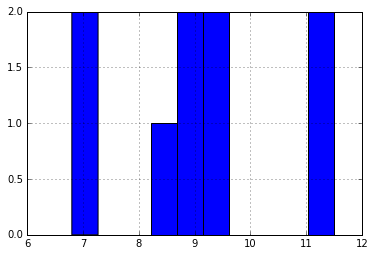

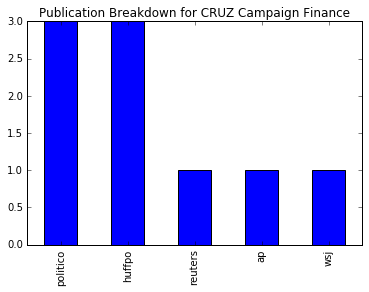

FLESCH FOR cruz Foreign Policy/National Security


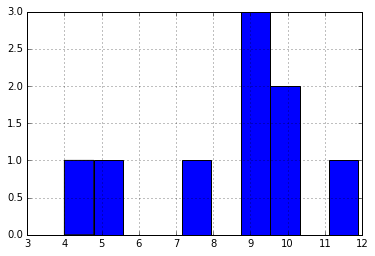

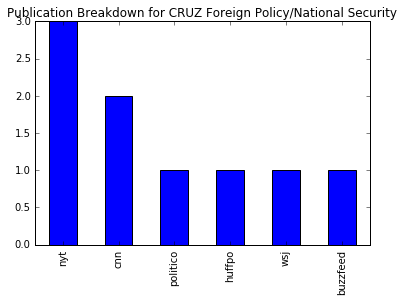

FLESCH FOR cruz Abortion


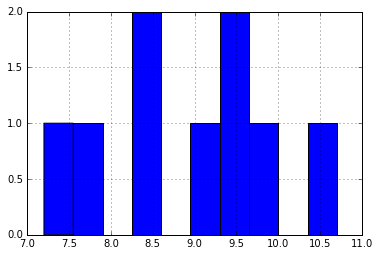

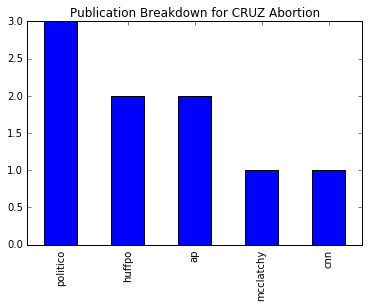

FLESCH FOR sanders Immigration


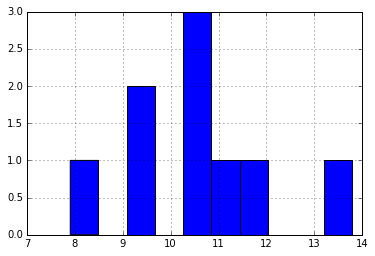

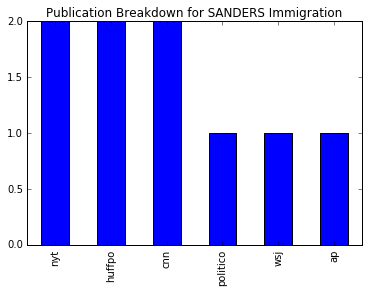

FLESCH FOR sanders Campaign Finance


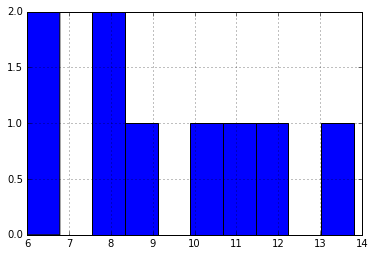

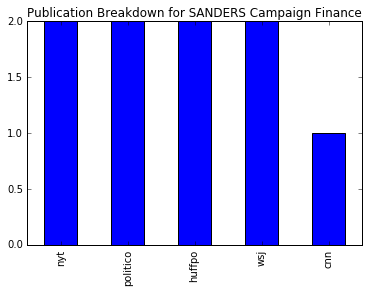

FLESCH FOR sanders Foreign Policy/National Security


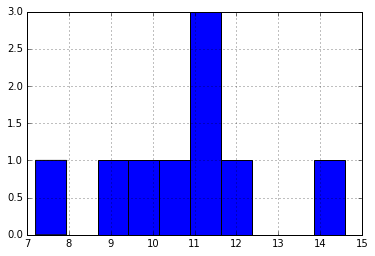

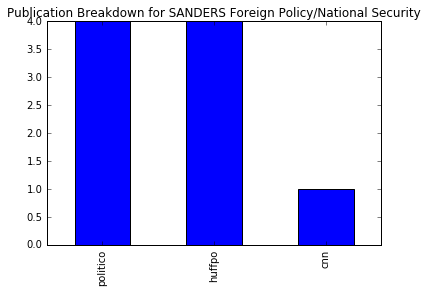

FLESCH FOR sanders Abortion


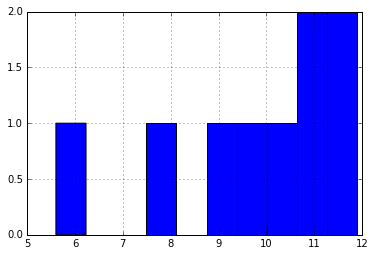

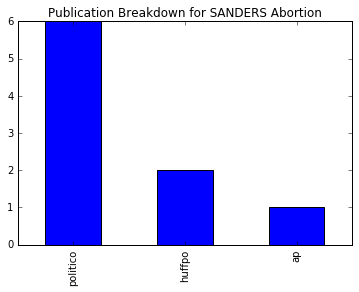

In [40]:
for c in CANDIDATES:
    for t in TOPICS: 
        print "FLESCH FOR", c, t
        df[(df['candidate'] == c) & (df['top_topic'] == t)]['flesch'].hist() 
        matplotlib.pyplot.show()
        df[(df['candidate'] == c) & (df['top_topic'] == t)]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c.upper() + " " + t)
        matplotlib.pyplot.show()